In [23]:
!pip install blockdiag
!mkdir diag

Ya existe el subdirectorio o el archivo diag.


In [24]:
from IPython.display import Image,SVG

# Divide y vencerás

* Complejidad de algoritmos
* Estrategia de divide y vencerás
* Ejemplos

# Complejidad de algoritmos

* Corrección / rendimiento
  * ¿Y cuando el rendimiento es parte de la corrección?

Lo más importante a la hora de realizar un programa es que podamos confiar en los resultados que produzca. Queremos que el balance de nuestra cuenta sea calculado correctamente, que los inyectores de los automóviles faciliten la cantidad correcta de combustible en cada momento, y no queremos que los sistemas operativos fallen o los aviones se estrellen.

Pero a veces la corrección es tan importante como el rendimiento, de hecho el rendimiento puede ser parte de la corrección.  Es el caso de los sistemas de tiempo real, en los que la respuesta debe estar disponible dentro de unos márgenes de tiempo estricto.

# ¿Cuánto tarda?

Depende de:
 * Ordenador
 * Python
 * **Entrada**

In [25]:
def fact(n):
    ret = 1
    while i > 1:
        ret *= n
        n -= 1
    return ret

Para saber cuánto tarda podemos ejecutar el programa para un conjunto de entradas determinado y medir cuánto tarda, pero no sería particularmente informativo porque depende de:
* El modelo y velocidad del ordenador que ejecuta el programa
* De la implementación concreta del intérprete de Python
* De la entrada proporcionada

Los dos primeros pueden soslayarse si usamos una representación más abstracta del tiempo, el paso de ejecución.  Se trata de cualquier operación que tarda un tiempo fijo (una operación aritmética, la asociación de un valor a un nombre, ejecutar una comparación, o acceder a un objeto de la memoria).  Por simplicidad utilizaremos un modelo de máquina de acceso aleatorio, en la que los pasos se ejecutan en secuencia y los accesos a cualquier objeto tardan lo mismo.  Hoy en día sería más correcto un modelo de máquina de acceso aleatorio paralela, pero complicaría demasiado el análisis y en términos cualitativos no supone diferencia significativa.

## Depende de valores 

Tres casos:
* Caso mejor
* Caso peor
* Caso típico

In [26]:
def buscar(L, x):
    for e in L:
        if e == x:
            return True
    return False

El tiempo de ejecución de un algoritmo no solo depende del tamaño de las entradas sino de los propios valores.  Considera el caso de la transparencia que corresponde  a una búsqueda lineal. L puede tener un millón de elementos, pero ¿qué pasaría si el primer elemento coincide con x? Devolvería True de manera inmediata.  En cambio si el valor de x no está en L la función tendrá que examinar un millón de elementos antes de devolver False.

Hay tres grandes casos que examinar:
* El caso mejor, aquél en el que el algoritmo tardaría menos tiempo porque las entradas son tan favorables como sea posible. Por ejemplo, para la búsqueda lineal de la transparencia el caso mejor no depende del tamaño de L.
* El caso peor, que corresponde al tiempo de ejecución mayor que puede darse.  Para la función buscar sería lineal respecto al tamaño de la lista.
* El caso típico, caso medio, o caso esperado. Normalmente será la media de los tiempos de ejecución para todas las entradas posibles del mismo tamaño.  Si se tiene información a priori de la distribución de los valores de entrada puede tenerse en cuenta en el cálculo. Por ejemplo, *el 90% de las veces x está en L*.

El caso peor define una cota superior, y por tanto suele ser donde se concentra el interés de los ingenieros. No nos vale que un avión funcione la mayor parte de las veces, o que el sistema de control aéreo detecte posibles colisiones después de que se han producido.

## Calculemos

* Asignación inicial y `return`: 2
* Bucle:
  * Comparación: 1
  * Multiplicación y asignación: 2
  * Resta y asignación: 2

In [27]:
def fact(n):
    ret = 1
    while i > 1:
        ret *= n
        n -= 1
    return ret

El número de pasos que ejecuta el algoritmo de cálculo del factorial de $n$ es de $2 + 5n$.  Los 2 corresponden a la primera asignación y al `return`. En cada iteración se ejecutan 5 pasos (uno de la comparación, y dos de cada una de las asignaciones). Las asignaciones del bucle requieren realizar una operación aritmética y luego asociar el nombre.

Sin embargo la constante sumativa puede ser ignorada para casi cualquier n a partir de un valor de unos 4. El valor exacto sería $4\cdot 5 + 2 = 22$, y despreciando la constante sería menos de un 10% inferior. Cuando $n$ es grande, que es cuando el uso de un ordenador empieza a ser interesante, la diferencia es francamente despreciable.

In [28]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rc('figure', figsize = [10,6])
plt.rc('font', size = 24)

No importan las constantes que se suman a un término que depende de $n$.

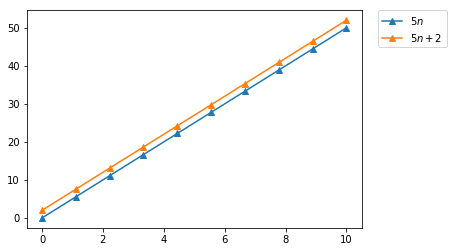

In [29]:
n = np.linspace(0, 10, 10)
plt.plot(n, 5*n,   '-^', label='$5n$') 
plt.plot(n, 5*n+2, '-^', label='$5n + 2$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Calculemos (raíz, enumeración exhaustiva)

* Despreciamos lo que está fuera del bucle
* Bucle: $\sim O(6n)$, donde $n = x/\epsilon$
  * Multiplicación, resta, valor absoluto y comparación: 4
  * Suma y asignación: 2

In [30]:
def raiz(x, epsilon):
    inc = epsilon**2
    r = 0.
    while abs(r*r - x) >= epsilon:
        r += inc
    if r*r > x:
        raise ValueError
    return r

## Calculemos (raíz, bisección)

* Despreciamos lo que está fuera del bucle
* Bucle: $\sim O(10\log_2 n)$, donde $n = x/\epsilon$
  * Multiplicación, resta, valor absoluto y comparación: 4
  * Multiplicación y comparación: 2
  * Asignación: 1
  * Suma, división y asignación: 3

In [31]:
def raizBi(x, epsilon):
    low = 0.0
    high = max(1.0, x)
    r = (high + low)/2.0
    while abs(r*r - x) >= epsilon:
        if r*r < x: low = r
        else: high = r
        r = (high + low)/2.0
    return r

## Comparando algoritmos

* No importan las constantes multiplicativas en un término que depende de $n$

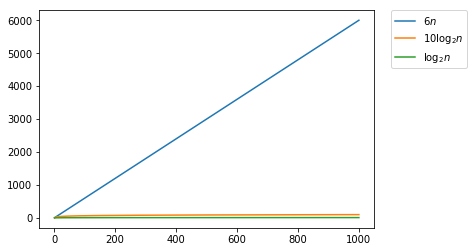

In [32]:
n = np.linspace(1, 1000, 1000)
plt.plot(n, 6*n,           label='$6n$') 
plt.plot(n, 10*np.log2(n), label='$10\log_2 n$')
plt.plot(n, np.log2(n), label='$\log_2 n$')
#plt.plot(n, np.log(n), label='$\log n$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [33]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Aproximación asintótica (*big O*)

* Si $t = t_1 + t_2$
  * Solo el de mayor tasa de crecimiento
* Si $t = k\cdot t_1 \cdot t_2$
  * Sin constantes

| BigO | Nombre |
| :- |:---|
| $O(1)$ | Constante |
| $O(\log n)$ | Logarítmico |
| $O(n)$ | Lineal |
| $O(n\log n)$ | Log-lineal |
| $O(n^k)$ | Polinómico |
| $O(e^n)$ | Exponencial |

# Gráficas en Python

Ejemplo de gráfica:

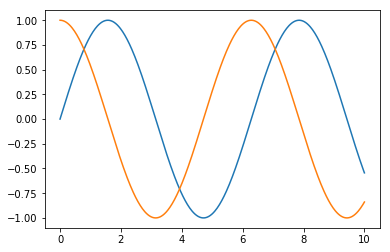

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

t = np.linspace(0, 10, 400)
plt.plot(t, np.sin(t), t, np.cos(t))
plt.show()

# Divide y vencerás

* Si el problema es fácil, resolverlo
* Si es difícil, dividirlo en partes más pequeñas



# Ejemplos

* Encontrar el coche en un parking
* Buscar un nombre en la guía
* Encontrar la salida de un hotel

## Estrategia de EncontrarSalida

* Prueba con la puerta a tu lado
* Si no es la salida, avanza a la siguiente puerta y reintenta la estrategia `EncontrarSalida`

## Elementos de la solución

* Intentar solución directa
  * *Comprobar puerta a tu lado*
* Si no funciona → misma estrategia, problema más pequeño
  * *Avanzar a la siguiente puerta*


# Ejemplo: $x^n$

Solución directa, $O(n)$

In [35]:
def pot(x, n):
    res = 1
    for i in range(n):
        res *= x
    return res

# Ejemplo: $x^n$

Divide y vencerás, dos casos, $O(\log n)$
 * $x_{n/2} \cdot x_{n/2}$ si $n$ es par
 * $x_{(n-1)/2} \cdot x_{(n-1)/2} \cdot x$ si $n$ es impar

In [36]:
def pot(x, n):
    if n == 1: return x
    if n % 2 == 0:
        y = pot(x, n//2)
        return y*y
    y = pot(x, (n-1)//2)
    return y*y*x

# Ejemplo: Números de Fibonacci

Algoritmo trivial recursivo, $O(\Phi^n)$

In [37]:
def fib(n):
    '''Asume n entero positivo
     Retorna el término n de la sucesión de Fibonacci'''
    if (n<2): return 1
    return fib(n-1) + fib(n-2)


# Ejemplo: Números de Fibonacci

Algoritmo *bottom-up*, $O(n)$

In [38]:
def fib(n):
    f = [ 0, 1 ]
    for i in range(2, n+1):
        f.append(f[i-1]+f[i-2])
    return f[-1]

# Ejemplo: Números de Fibonacci

Algoritmo trivial con potencia de GR, $O(\log n)$
* Problemas con recondeos en operaciones con reales

In [39]:
def fib(n):
    from math import sqrt
    sq5 = sqrt(5)
    phi = (sq5 + 1.)/2.
    return round(pot(phi, n)/sq5, 0)

# Ejemplo: Números de Fibonacci

Algoritmo con potencia de matrices, $O(\log n)$
$$
\begin{bmatrix}
    F_{n+1} & F_n \\
    F_n & F_{n-1} 
\end{bmatrix}
=
\begin{bmatrix}
    1 & 1 \\
    1 & 0 
\end{bmatrix}^n
$$

In [40]:
def fib(n):
    if n<2: return n
    return pot([1, 1, 1, 0], n-1)[0]

## Potencia de matrices 2x2

Mismo algoritmo de la potencia normal, pero con matrices

In [41]:
def pot(x, n):
    if n == 0: return [1, 0, 0, 1 ]
    if n == 1: return x
    if n % 2 == 0:
        y = pot(x, n//2)
        return mul(y,y)
    y = pot(x, (n-1)//2)
    return mul(mul(y,y),x)

## Multiplicar matrices 2x2

In [42]:
def mul(a,b):
    return (dot(a[0:2],b[0:4:2]),
            dot(a[0:2],b[1:4:2]),
            dot(a[2:4],b[0:4:2]),
            dot(a[2:4],b[1:4:2]))

def dot(a,b):
      return a[0]*b[0]+a[1]*b[1]

## Multiplicar matrices $n\times n$

Para cada elemento de la matriz resultado hay que multiplicar $n\times n$ elementos.
$$ c_{ij} = \sum_k a_{ik} b_{kj} $$

## Multiplicar matrices $n\times n$

Algoritmo trivial, $O(n^3)$

In [43]:
def mul(a,b):
    n = len(a)
    c = tuple(tuple(0 for i in range(n)) for j in range(n))
    for i in range(n):
        for j in range(n):
            for k in range(n):
                c[i][j] += a[i][k]*b[k][j]
    return c

## Multiplicar matrices $n\times n$

Algoritmo de divide y vencerás, descomponiendo en matrices $\frac{n}{2} \times \frac{n}{2}$

$$
\begin{bmatrix}
    A_{11} & A_{12} \\
    A_{21} & A_{22} 
\end{bmatrix}
\begin{bmatrix}
    B_{11} & B_{12} \\
    B_{21} & B_{22} 
\end{bmatrix}
=
\begin{bmatrix}
    C_{11} & C_{12} \\
    C_{21} & C_{22} 
\end{bmatrix}\\ ~ \\
C_{11} = A_{11}B_{11} + A_{12}B_{21} \\
C_{12} = A_{11}B_{12} + A_{12}B_{22} \\
C_{21} = A_{21}B_{11} + A_{22}B_{21} \\
C_{22} = A_{21}B_{12} + A_{22}B_{22}
$$

8 productos de $\frac{n}{2} \times \frac{n}{2}$:

$ T(n) \sim 8T(n/2) + O(n^2) \sim O(n^{\log_2 8}) = O(n^3) $

In [44]:
def mul(A,B):
    assert len(A) == len(A[0]) == len(B) == len(B[0])
    if len(A) == 1:
        return ((A[0][0] * B[0][0],),)
    assert len(A) % 2 == 0
    A11, A12, A21, A22 = split(A)
    B11, B12, B21, B22 = split(B)
    C11 = mul(A11,B11) + mul(A12,B21)
    C12 = mul(A11,B12) + mul(A12,B22)
    C21 = mul(A21,B11) + mul(A22,B21)
    C22 = mul(A21,B12) + mul(A22,B22)
    return merge(C11, C12, C21, C22)

def split(M):
    mid = len(M) // 2
    return  tuple(a[:mid] for a in M[:mid]), \
            tuple(a[mid:] for a in M[:mid]), \
            tuple(a[:mid] for a in M[mid:]), \
            tuple(a[mid:] for a in M[mid:])

def merge(M11, M12, M21, M22):
    return tuple( a + b for a,b in zip(M11 + M21, M12 + M22) )    

In [45]:
mul(((1,1),(0,1)), ((1,0),(0,1)))

((1, 0), (0, 1), (0, 0), (0, 1))

## Multiplicar matrices $n\times n$

Algoritmo de Strassen, descomponiendo en matrices $\frac{n}{2} \times \frac{n}{2}$

$$
\begin{align}
M_1 &= (A_{11}+ A_{22})\cdot (B_{11}+ B_{22}) \\
M_2 &= (A_{21}+ A_{22}) \cdot B_{11} \\
M_3 &= A_{11} \cdot (B_{12}- B_{22}) \\
M_4 &= A_{22} \cdot (B_{21}- B_{11}) \\
M_5 &= (A_{11}+ A_{12}) \cdot B_{22} \\
M_6 &= (A_{21}- A_{11}) \cdot (B_{11}+ B_{12}) \\
M_7 &= (A_{12}- A_{22}) \cdot (B_{21}+ B_{22}) \\
\end{align}
$$

$$
\begin{align}
C_{11} &= M_1+ M_4- M_5+ M_7 \\
C_{12} &= M_3+ M_5 \\
C_{21} &= M_2+ M_4 \\
C_{22} &= M_1- M_2+ M_3+ M_6 \\
\end{align}
$$

7 productos de $\frac{n}{2} \times \frac{n}{2}$:

$ T(n) \sim 7T(n/2) + O(n^2) \sim O(n^{2.8074})$

In [46]:
def mul(A,B):
    assert len(A) == len(A[0]) == len(B) == len(B[0])
    if len(A) == 1:
        return ((A[0][0] * B[0][0],),)
    assert len(A) % 2 == 0
    A11, A12, A21, A22 = split(A)
    B11, B12, B21, B22 = split(B)
    M1 = mul(add(A11,A22), add(B11,B22))
    M2 = mul(add(A21,A22), B11)
    M3 = mul(A11, sub(B12, B22))
    M4 = mul(A22, sub(B21, B11))
    M5 = mul(add(A11,A12), B22)
    M6 = mul(sub(A21,A11), add(B11,B12))
    M7 = mul(sub(A11,A22), add(B21,B22))
    C11 = add(sub(add(M1, M4), M5), M7)
    C12 = add(M3, M5)
    C21 = add(M2, M4)
    C22 = add(add(sub(M1, M2), M3), M6)
    return merge(C11, C12, C21, C22)

def add(A,B):
    return tuple(tuple(a+b for a,b in zip(Ai,Bi)) for Ai,Bi in zip(A,B))

def sub(A,B):
    return tuple(tuple(a-b for a,b in zip(Ai,Bi)) for Ai,Bi in zip(A,B))

In [47]:
mul(((1,1),(0,1)), ((2,0),(0,2)))

((2, 2), (0, 2))

# Ejemplo: Torres de Hanoi

<img src="https://upload.wikimedia.org/wikipedia/commons/0/07/Tower_of_Hanoi.jpeg">

Mover $n$ discos del palo $A$ hasta el palo $B$. Mas detalles en [este cuaderno](hanoi.ipynb).

## Torres de Hanoi con divide y vencerás

Para mover $n$ discos de *origen* a *destino*:
* Si $n = 0$ no hay nada que hacer
* Mover $n-1$ discos de *origen* a otro palo temporalmente
* Mover un disco de *origen* a *destino*
* Mover $n-1$ discos del otro palo a *destino*

In [48]:
def hanoi(ndiscos, desde = 0, hasta = 2):
    if ndiscos == 0: return []
    tmp = ({0,1,2} - {desde,hasta}).pop()
    return hanoi(ndiscos-1, desde, tmp) + [(desde, hasta)] + hanoi(ndiscos-1, tmp, hasta)

In [49]:
hanoi(3)

[(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]

## Determinar el otro palo temporal

Se pueden numerar los palos, o usar letras para identificarlos.
* El que no es ni *origen* ni *destino* se puede calcular con resta de conjuntos

In [50]:
{1,2,3} - {1,3}

{2}

In [51]:
{2}.pop()

2

## Torres de Hanoi con generadores

In [52]:
def hanoi(ndiscos, desde = 0, hasta = 2):
    if ndiscos == 0: return
    tmp = ({0,1,2} - {desde,hasta}).pop()
    yield from hanoi(ndiscos-1, desde, tmp)
    yield (desde, hasta)
    yield from hanoi(ndiscos-1, tmp, hasta)

In [53]:
list(hanoi(3))

[(0, 2), (0, 1), (2, 1), (0, 2), (1, 0), (1, 2), (0, 2)]

# Ejemplo: Fractales de Barnsley



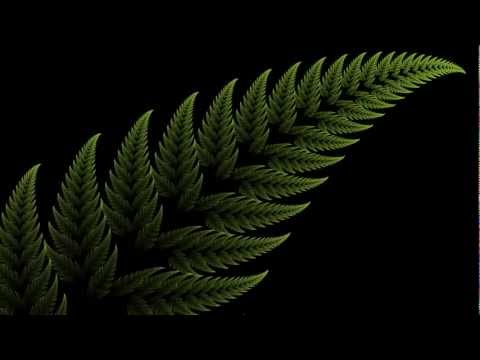

In [54]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('vDfgMqGbotU')

## Dibujar imágenes en Python

* Mostrar una matriz de valores entre 0 y 1 (*NumPy*) como un PNG

In [55]:
import PIL.Image
from io import BytesIO
import IPython.display
import numpy as np

def showarray(a):
    a = np.uint8(np.clip(a * 255, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, 'png')
    IPython.display.display(IPython.display.Image(data=f.getvalue()))

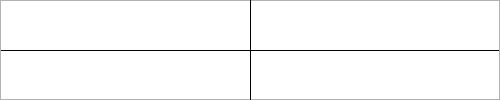

In [56]:
img = np.full((100,500), 1.)
for i in range(500): img[50][i] = 0. ; img[0][i] = img[99][i] = 0.7
for i in range(100): img[i][250] = 0. ; img[i][0] = img[i][499] = 0.7
showarray(img)

## El método de Barnsley

$$ 
\begin{bmatrix}
    x_n  \\
    y_n  
\end{bmatrix} =
\begin{bmatrix}
    a & b  \\
    c & d 
\end{bmatrix} \cdot 
\begin{bmatrix}
    x_{n-1}  \\
    y_{n-1}  
\end{bmatrix} +
\begin{bmatrix}
    e  \\
    f  
\end{bmatrix} 
$$


| *p* | *a* | *b* | *c* | *d* | *e* | *f* |
|---|---|---|---|---|---|---|
|0.02|  0.0|   0.0|    0.0|   0.27|  0.5|    0.0|
|0.15| -0.139| 0.263|  0.246| 0.224| 0.57|  -0.036|
|0.13|  0.17| -0.215|  0.222| 0.176| 0.408|  0.0893|
|0.7|   0.781| 0.034| -0.032| 0.739| 0.1075| 0.27|



El método consiste en aplicar sucesivamente una transformación afín a un punto inicial.  La transformación afín se elige de entre un conjunto limitado con una probabilidad (*p*) determinada.  Para representarlo basta calcular en qué pixel cae cada uno de los puntos del método.  Para mayor flexibilidad aplicaremos una última transformación afín para poder desplazar y rotar adecuadamente la figura generada.

In [62]:
def barnsley_fern(data):
    height, width = 500, 500
    img = np.full((height, width),1.)
    for v in barnsley_points(data['coefs']):
        y,x = affine_transform(v, data['affine'])
        img[int(y) % height][int(x) % width] = 0.
    showarray(img)

def barnsley_points(coefs):
    v = .5, .0
    for i in range(1000000):
        yield v
        v = barnsley_transform(v, coefs)

In [63]:
helecho1 = {
    'coefs': (
        (.01,  .0,   .0,   .0,  .16, .0,  .0),
        (.85,  .85,  .04, -.04, .85, .0, 1.6),
        (.07,  .20, -.26,  .23, .22, .0, 1.6),
        (.07, -.15,  .28,  .26, .24, .0,  .44)
    ),
    'affine': (0., -45., 45., 0., 0., 200.)
}

In [59]:
import random

def barnsley_transform(v, coefs):
    rand = random.uniform(0,1)
    for r in coefs:
        if rand < r[0]:
            return affine_transform(v, r[1:])
        rand -= r[0]
    raise ValueError('Las probabilidades deben sumar 1')

def affine_transform(v, a):
    return v[0]*a[0] + v[1]*a[1] + a[4], \
           v[0]*a[2] + v[1]*a[3] + a[5]

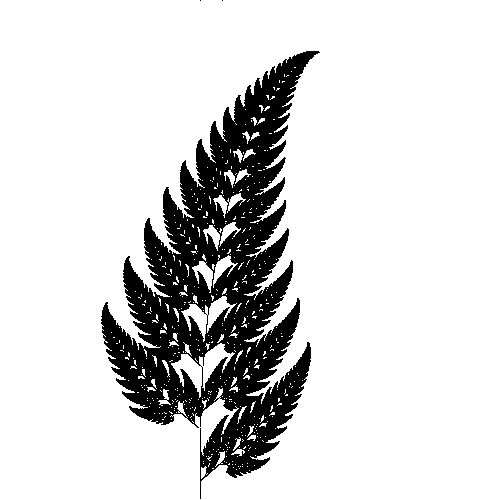

In [60]:
barnsley_fern(helecho1)

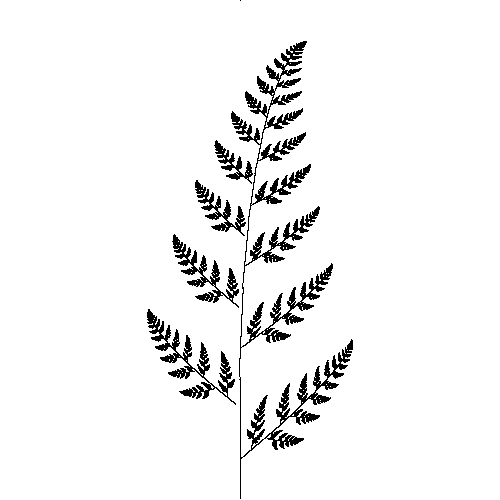

In [61]:
helecho2 = {
    'coefs': (
        (.02,  .0,   .0,    .0,  .27,   .5,    .0),
        (.15, -.139, .263,  .246, .224, .57,  -.036),
        (.13,  .17, -.215,  .222, .176, .408,  .0893),
        (.7,   .781, .034, -.032, .739, .1075, .27)
    ),
    'affine': (0., -480., 480., 0., 0., 0.)
}

from math import cos, sin, pi

sierpinski = {
    'coefs': (
        (.33, .5, .0, .0, .5,  1.,  1.),
        (.33, .5, .0, .0, .5,  1., 50.),
        (.34, .5, .0, .0, .5, 50., 50.)
    ),
    'affine': (3.5*sin(pi/4), -3.5*cos(pi/4), 3.5*cos(pi/4), 3.5*sin(pi/4), -150, 0)
}

barnsley_fern(helecho2)

# Créditos

Basado en http://web.eecs.umich.edu/~aprakash/eecs282/lectures/11-recursion.pdf
